In [1]:
from tensorflow import keras
import tensorflow as tf
import gc

In [2]:
from CustomLayers import *
from GS_composer import *
from Functions import *
from ClassModel import *

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [3]:
#user_profile = "E:/learning resource/"
user_profile = "C:/Users/uqcche32/"
user_profile = "D:/"

Model_series = "MultiLevel/Densely/MultiLevel_Attention_1Head16eb16LC1LB_1000BayesRsSNP_v1_mse_pcaIndex"
#Model_series = "MultiLevel/MultiLevel_Attention_1Head16eb16LC10LB_pcaIndex"
Model_path = user_profile+"OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/" + Model_series
#Model_path = "F:/PhD_Notebook/Code/ML_composer/"
#Model_path = "H:/ML_archive/test_model"
#Model_path = "E:/learning resource/OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/"

In [4]:
from keras import backend as K

In [5]:
print(tf.__version__)

2.9.1


In [6]:
model_folder = "smut_MultiLevelAttention_1"

#model_folder = "test_model"
full_path = Model_path + "/" + model_folder
print(full_path)
model = keras.models.load_model(full_path,custom_objects={"MultiLevel_BlockAttention": MultiLevel_BlockAttention,
                                                         "OrdinalOutputLayer":OrdinalOutputLayer,
                                                         "GroupedLocallyConnectedLayer":GroupedLocallyConnectedLayer})

D:/OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/MultiLevel/Densely/MultiLevel_Attention_1Head16eb16LC1LB_1000BayesRsSNP_v1_mse_pcaIndex/smut_MultiLevelAttention_1
(None, 1001, 16)
from buiild


In [7]:
model.summary()
#model = keras.Model(inputs=input1, outputs=QV_output)
model.compile(optimizer="RMSprop", loss="mean_squared_error")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer_1 (InputLayer)     [(None, 1000, 1)]    0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 1001, 1)     0           ['input_layer_1[0][0]']          
                                                                                                  
 locally_connected1d (LocallyCo  (None, 1001, 16)    16016       ['zero_padding1d[0][0]']         
 nnected1D)                                                                                       
                                                                                                  
 dense (Dense)                  (None, 1001, 16)     272         ['locally_connected1d[0][0]']

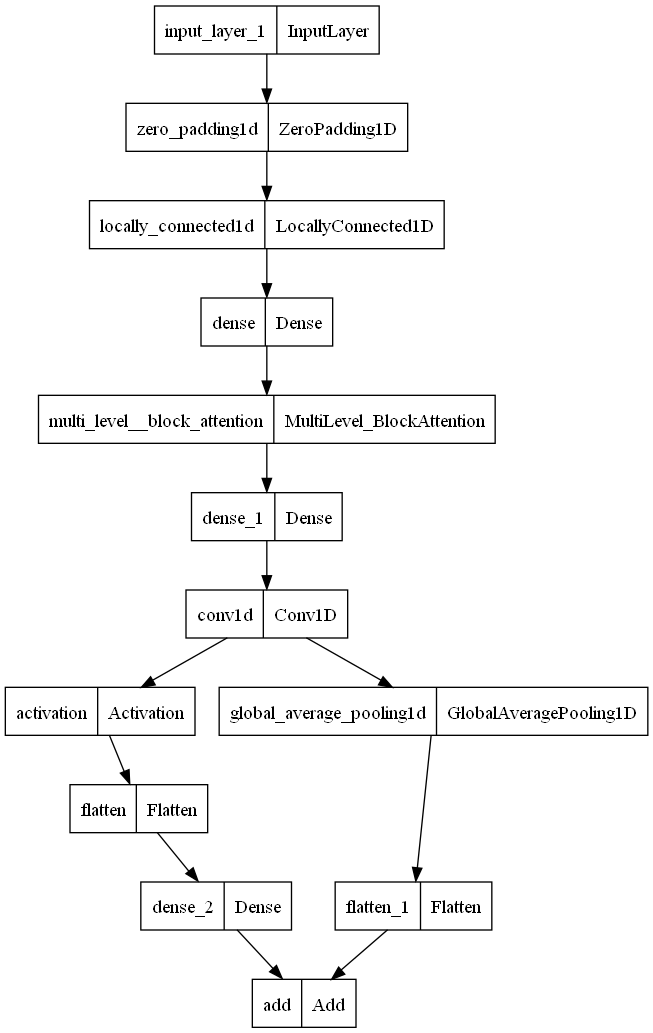

In [8]:

keras.utils.plot_model(model,to_file=full_path + "model.png")

A test variable of SNP array based on the freq of alleles.

In [9]:

#data = np.ones((1, 26086, 1))
test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease_1000.freqV1.ped"
#test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
data=np.expand_dims(data,axis=-1)
print(data.shape)

(1, 1000, 1)


Model predict via test freq data

In [10]:
model.predict(data)

c:\Users\70651\.conda\envs\DL\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 1s 786ms/step


array([[5.722212]], dtype=float32)

Extract layer weights and outputs from the model

In [36]:
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[7].output)
print(model.layers[6].name )

conv1d


In [37]:
intermediate_output = intermediate_layer_model.predict(data)

1/1 [==============================] - 0s 151ms/step


c:\Users\70651\.conda\envs\DL\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [38]:
attention = intermediate_output
attention = K.expand_dims(attention,axis=1)
print(attention.shape)
print(attention.shape)
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
#plt.scatter(x=np.tile(np.arange(0,1001),1),y=abs(attention))


(1, 1, 1001, 1)
(1, 1, 1001, 1)


In [39]:
x,y,z,d = attention.shape
attention = tf.reshape(attention,(z,x,d))

In [40]:
mean_SNP_attention = attention
#mean_SNP_attention = tf.reduce_mean(SNP_attention,axis=2)
mean_SNP_attention.shape
#mean_SNP_attention =np.array(tf.reshape(mean_SNP_attention,(26080,))) #np.array(tf.reshape(mean_SNP_attention,(26080*32,)))
mean_SNP_attention =np.array(tf.reshape(mean_SNP_attention,(z,d)))

In [16]:
import matplotlib.pyplot as plt
import math

In [41]:
np.mean(mean_SNP_attention)
#mean_SNP_attention = tf.reduce_sum(mean_SNP_attention,axis=-1)

0.44575328

In [42]:
print(mean_SNP_attention.shape)
print(mean_SNP_attention[-1])
print(os.getcwd())

(1001, 1)
[0.54254186]
d:\PhD_Notebook\Code\ML_composer


(1001, 1, 1)


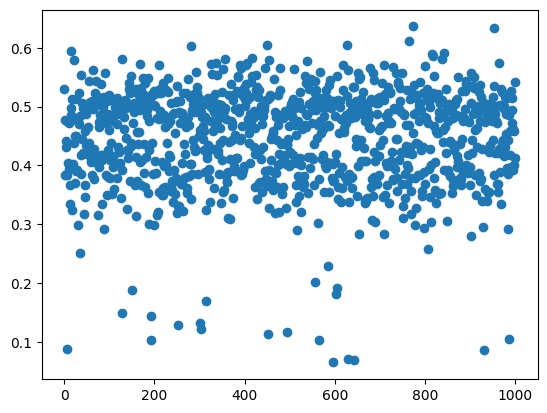

In [46]:
print(attention.shape)
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
plt.scatter(x=np.tile(np.arange(0,z),d),y=mean_SNP_attention)
np.savetxt("smut1_attentions_freq.csv",mean_SNP_attention,delimiter="\t")

1/1 [==============================] - 0s 141ms/step
(1, 1, 1001, 1)


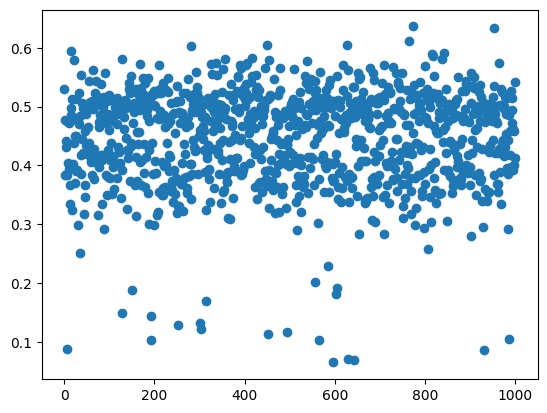

In [20]:
intermediate_conv1 = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[7].output)

intermediate_conv1_output = intermediate_conv1.predict(data)
conv_attention = K.expand_dims(intermediate_conv1_output,axis=1)
print(conv_attention.shape)
conv_attention =np.array(tf.reshape(conv_attention,(1001,1)))
plt.scatter(x=np.tile(np.arange(0,1001),1),y=conv_attention)

(1001, 1)


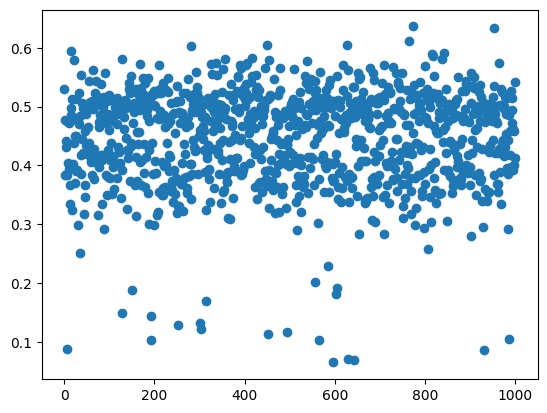

In [21]:
print(mean_SNP_attention.shape)
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
plt.scatter(x=np.tile(np.arange(0,1001),d),y=mean_SNP_attention)

In [22]:
epi_weight = model.layers[4].get_weights()
#epi_weight[3].shape
channel_dense_weight = model.layers[5].get_weights()
print(channel_dense_weight[0].shape)
print(os.getcwd())

(16, 16)
d:\PhD_Notebook\Code\ML_composer


(1001, 1001)
dense
(16, 16)
1/1 [==============================] - 0s 132ms/step
(1, 1001, 16)
(1001, 16)
(1001, 16)
tf.Tensor(0.58559996, shape=(), dtype=float32)


c:\Users\70651\.conda\envs\DL\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


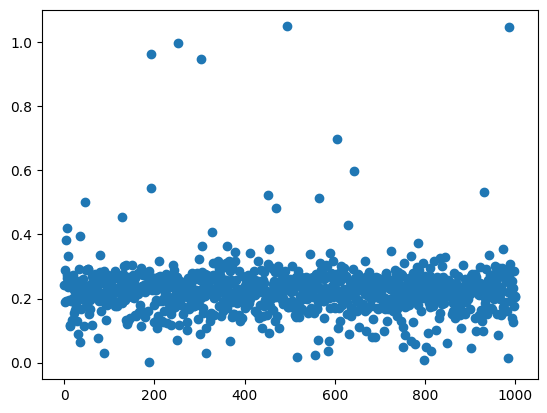

(1001,)


In [31]:

print(epi_weight[3].shape)
print(model.layers[3].name)
densely_weights = model.layers[5].get_weights()
print(densely_weights[0].shape)
intermediate_padding = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[3].output)
intermediate_padding_out = intermediate_padding.predict(data)
print(intermediate_padding_out.shape)
channels = intermediate_padding_out.shape[-1]
intermediate_padding_out = tf.reshape(intermediate_padding_out,(z,channels))
print(intermediate_padding_out.shape)
epi_freq = tf.matmul(
    tf.multiply(
        epi_weight[3],tf.nn.sigmoid(
            tf.matmul(
                intermediate_padding_out,intermediate_padding_out,transpose_b=True)/np.sqrt(z)
                )
                ),intermediate_padding_out)
print(epi_freq.shape)
print(epi_freq[0][-1])
after_dense = tf.matmul(epi_freq,densely_weights[0])
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
plt.scatter(x=np.tile(np.arange(0,z),1),y=abs(tf.reduce_mean(after_dense,axis=-1))/2)
plt.show()
np.savetxt("smut1_epi1.csv",abs(tf.reduce_mean(after_dense,axis=-1))/2,delimiter="\t")
print(abs(tf.reduce_mean(after_dense,axis=-1)).shape)

C:\Users\70651\AppData\Local\Temp\ipykernel_10316\3252267119.py:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("spring").copy()
  cmap.set_bad(color='white')


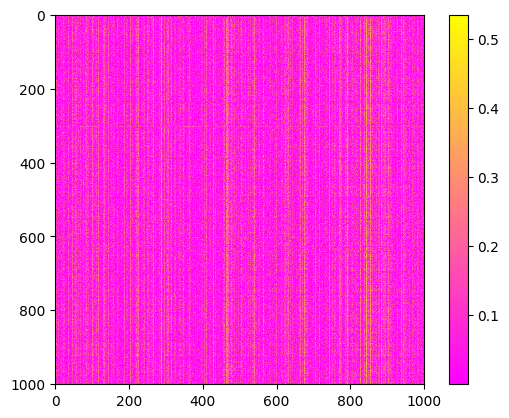

In [24]:
cmap = plt.cm.spring  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')
plt.imshow(abs(epi_weight[3]), interpolation='nearest',cmap=cmap)
plt.colorbar()
plt.show()

(1001,)


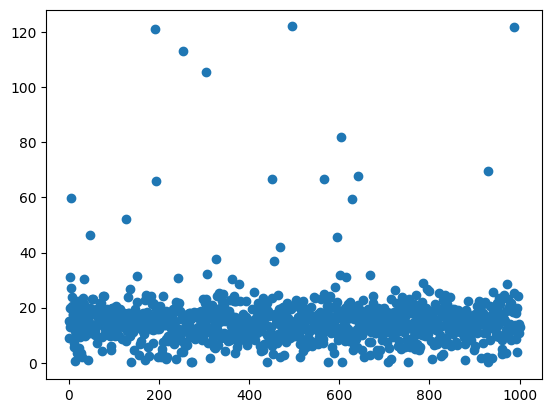

In [ ]:
epi_sum = tf.reduce_sum(epi_weight[3],axis=1)
print(epi_sum.shape)
plt.scatter(x=np.tile(np.arange(0,1001),1),y=abs(epi_sum))

In [ ]:
def export_attention_score_by_trait(filename,trait,val):
    model = keras.models.load_model(filename,custom_objects={"MultiHead_QKV_BlockAttention": MultiHead_QKV_BlockAttention,
                                                         "SNPBlockLayer":SNPBlockLayer})
    model.summary()
    #model = keras.Model(inputs=input1, outputs=QV_output)
    model.compile(optimizer="RMSprop", loss="mean_squared_error")
    test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
    data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
    data=np.expand_dims(data,axis=-1)
    print(data.shape)
    intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.get_layer('add_3').output)
    intermediate_output = intermediate_layer_model.predict(data)
    attention = intermediate_output[0]
    attention = K.expand_dims(attention,axis=1)
    print(attention.shape)
    
    LNN_weight = model.layers[2].get_weights()
    SNP_attention = tf.multiply(attention,LNN_weight[0])
    SNP_attention = np.array(tf.reshape(SNP_attention,(32,26080)))
    SNP_attention = pd.DataFrame(SNP_attention,columns=list(range(1,SNP_attention.shape[1]+1)))
    SNP_attention.shape
    SNP_attention.insert(0,'Channel',range(1,33))
    SNP_attention.insert(0,'Val',val)
    SNP_attention.insert(0,"Trait",trait)
    
    SNP_attention = SNP_attention.values.tolist()
    #mean_SNP_attention = [trait,val]+list(np.array(tf.reshape(mean_SNP_attention,(26080,))))
    #mean_SNP_attention = pd.DataFrame([trait,val]+list(mean_SNP_attention),columns=[trait,val]+list(range(1,length(mean_SNP_attention))))
    model = None
    keras.backend.clear_session()
    gc.collect()
    
    return SNP_attention
    
    

In [ ]:
def export_LD_attention_score_by_trait(filename,trait,val):
    model = keras.models.load_model(filename,custom_objects={"MultiHead_QKV_BlockAttention": MultiHead_QKV_BlockAttention,
                                                         "SNPBlockLayer":SNPBlockLayer})
    model.summary()
    #model = keras.Model(inputs=input1, outputs=QV_output)
    model.compile(optimizer="RMSprop", loss="mean_squared_error")
    test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
    data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
    data=np.expand_dims(data,axis=-1)
    print(data.shape)
    intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.get_layer('multi_head_qkv__block_attention').output)
    intermediate_output = intermediate_layer_model.predict(data)
    attention = intermediate_output[0]
    attention = K.expand_dims(attention,axis=1)
    print(attention.shape)
    
    #LNN_weight = model.layers[2].get_weights()
    #SNP_attention = tf.multiply(attention,LNN_weight[0])
    LD_attention = np.array(tf.reshape(attention,(32,2608)))
    LD_attention = pd.DataFrame(LD_attention,columns=list(range(1,LD_attention.shape[1]+1)))

    LD_attention.insert(0,'Channel',range(1,33))
    LD_attention.insert(0,'Val',val)
    LD_attention.insert(0,"Trait",trait)
    
    LD_attention = LD_attention.values.tolist()
    #mean_SNP_attention = [trait,val]+list(np.array(tf.reshape(mean_SNP_attention,(26080,))))
    #mean_SNP_attention = pd.DataFrame([trait,val]+list(mean_SNP_attention),columns=[trait,val]+list(range(1,length(mean_SNP_attention))))
    model = None
    keras.backend.clear_session()
    gc.collect()
    
    return LD_attention

In [ ]:
Model_path = user_profile+"OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/1Head_RealForm32_32LocalB/"
records = []
for trait in ["smut","pachy"]:
    for val in range(1,6):
        filename = Model_path + trait + "_MultiHeadAttentionLNN_"+str(val)
        record = export_attention_score_by_trait(filename,trait,val)
        records.append(record)


In [ ]:
recordss = []
for i in records:
    for j in i:
        recordss.append(j)
records_df = pd.DataFrame(recordss,columns=["Trait","Val","Channel"]+list(range(1,26081)))
output_path = Model_path + "Attention_block_Normscore.csv"
records_df.to_csv(output_path,sep="\t",index=False)

In [ ]:
len(recordss[0])

In [ ]:
records.insert(0,"Val", #columns.values[0:2] = ["Trait","Val"]
output_path = Model_path + "Attention_score.csv"
records.to_csv(output_path,sep="\t",index=False)

In [ ]:
records_df.describe()

In [ ]:
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.get_layer('multi_head_qkv__block_attention').output)
intermediate_output = intermediate_layer_model.predict(data)
attention = intermediate_output[0]
attention = K.expand_dims(attention,axis=1)
print(attention.shape)
pd.DataFrame(np.array(tf.reshape(attention,(32,2608)))).describe()

In [ ]:
keras.backend.clear_session()
gc.collect()